<a href="https://colab.research.google.com/github/SarthakV7/Financial-analysis/blob/main/Portfolio_analysis_and_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some key statistics for portfolio analysis that we'll be using:
*   Daily returns: The percentage returned from 1 day to the next for a stock.
*   Cumulative return: The amount returned after an entire time period.
*   Avg. Daily return: Mean of daily returns
*   Std. Daily return: Std. Dev of daily returns (volatility)
*   Sharpe ratio: It is a measure for calculating the risk-adjustment return. It can be represented using the efficient frontier and is calculated using the formula:<br>
SR = $\frac{R_p - R_f}{\sigma_p}$; where, <br>
$R_p$ is expected portfolio return <br>
$R_f$ is risk-free return <br>
$\sigma_p$ is portfolio std. dev. <br>
<img src="https://static.seekingalpha.com/uploads/2018/8/39433316_15343047158205_rId5_thumb.jpg" width=400px> <br>
However, this formula was created for annual data, to convert the SR to monthly, weekly or daily, we can use the formula:<br>
ASR = $K*SR$ ; where,
  * Daily: K = sqrt(252)
  * Daily: K = sqrt(52)
  * Daily: K = sqrt(12)

How to interpret the sharpe ratio? If:

*   Sharpe ratio (ASR) > 3: Extremely good portfolio.
*   Sharpe ratio (ASR) > 2: Very good portfolio.
*   Sharpe ratio (ASR) > 1: Good portfolio (risk involved).
*   Sharpe ratio (ASR) < 1: Much risk envolved.


In [ ]:
!pip install quandl
!pip install --upgrade plotly

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
sns.set()

In [5]:
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2017-01-01')

In [8]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start_date, end_date=end_date) # .11 because we'll only be using Adj. Close prices
cisco = quandl.get('WIKI/CSCO.11', start_date=start_date, end_date=end_date) # .11 because we'll only be using Adj. Close prices
ibm = quandl.get('WIKI/IBM.11', start_date=start_date, end_date=end_date) # .11 because we'll only be using Adj. Close prices
amzn = quandl.get('WIKI/AMZN.11', start_date=start_date, end_date=end_date) # .11 because we'll only be using Adj. Close prices

In [10]:
for stock_df in (aapl, cisco, ibm, amzn):
  stock_df['normed return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

aapl.head()

,Adj. Close,normed return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


Let's do some allocations to our portfolio


In [11]:
# 30% to apple
# 20% to cisco
# 40% to amazon
# 10% to ibm

In [12]:
for stock_df, alloc in zip((aapl, cisco, ibm, amzn), (.3,.2,.4,.1)):
  stock_df['allocation'] = stock_df['normed return']*alloc

aapl.head()

,Adj. Close,normed return,allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


Suppose we invested 1 million in all the stocks, our position values in portfolio stocks would be:

In [21]:
investment = 1e6
for stock_df in (aapl, cisco, ibm, amzn):
  stock_df['position values'] = stock_df['allocation']*investment

all_pos_values = [aapl['position values'], cisco['position values'], ibm['position values'], amzn['position values']]
portfolio_val = pd.concat(all_pos_values, axis=1)
portfolio_val.columns = ['AAPL pos', 'CISCO pos', 'IBM pos', 'AMZN pos']
portfolio_val['Total pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL pos,CISCO pos,IBM pos,AMZN pos,Total pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


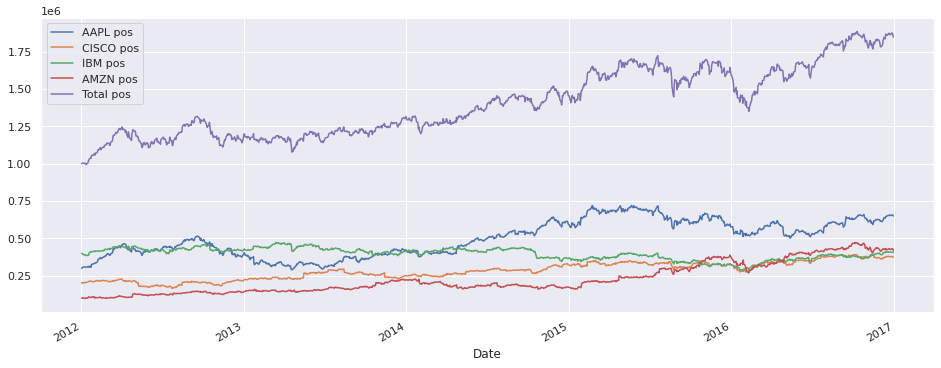

In [22]:
portfolio_val.plot(figsize=(16,6))
plt.show()

### Portfolio stats

In [23]:
portfolio_val.head()

,AAPL pos,CISCO pos,IBM pos,AMZN pos,Total pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [27]:
portfolio_val['daily return'] = portfolio_val['Total pos'].pct_change(1)
portfolio_val.head()

,AAPL pos,CISCO pos,IBM pos,AMZN pos,Total pos,daily return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [28]:
portfolio_val['avg. daily return'] = portfolio_val['daily return'].mean()
portfolio_val.head()

,AAPL pos,CISCO pos,IBM pos,AMZN pos,Total pos,daily return,avg. daily return
Date,,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN,0.000544
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996,0.000544
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761,0.000544
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675,0.000544
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487,0.000544


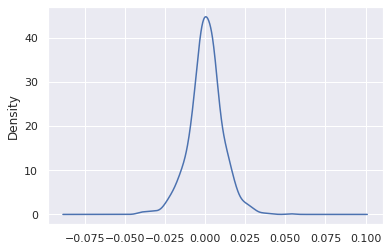

In [30]:
portfolio_val['daily return'].plot.kde()

In [40]:
mean_portfolio_return = portfolio_val['daily return'].mean()
portfolio_std = portfolio_val['daily return'].std()
risk_free_return = 0

In [38]:
cumulative_return = portfolio_val['Total pos'][-1]/portfolio_val['Total pos'][0] - 1
cumulative_return

0.8474285181665544

Let's calculate the Sharpe ratio

In [41]:
sr = (mean_portfolio_return - risk_free_return)/portfolio_std
sr

0.05149680662648092

In [43]:
annualized_sr = sr*np.sqrt(252)
print('Annualized sharpe ratio:', annualized_sr)

Annualized sharpe ratio: 0.8174864618859096


The sharpe ratio is < 1, which means there is much risk involved

### How to optimize the holdings to get a better sharpe ratio?

In [ ]:
!pip install quandl
!pip install --upgrade plotly

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
sns.set()

Adjusted Close price of the 4 stocks

In [9]:
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2017-01-01')

aapl = quandl.get('WIKI/AAPL.11', start_date=start_date, end_date=end_date) # .11 because we'll only be using Adj. Close prices
cisco = quandl.get('WIKI/CSCO.11', start_date=start_date, end_date=end_date) # .11 because we'll only be using Adj. Close prices
ibm = quandl.get('WIKI/IBM.11', start_date=start_date, end_date=end_date) # .11 because we'll only be using Adj. Close prices
amzn = quandl.get('WIKI/AMZN.11', start_date=start_date, end_date=end_date) # .11 because we'll only be using Adj. Close prices

In [16]:
stocks = pd.concat((aapl, cisco, ibm, amzn), axis=1)
stocks.columns = ['aapl', 'cisco', 'ibm', 'amzn']
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


Daily mean return

In [17]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

Daily pearson correlation

In [18]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


Let's convert the adjessted daily return to daily log-returns <br>
$r_{t} = log \frac{p_t}{p_{t-1}}$

In [20]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


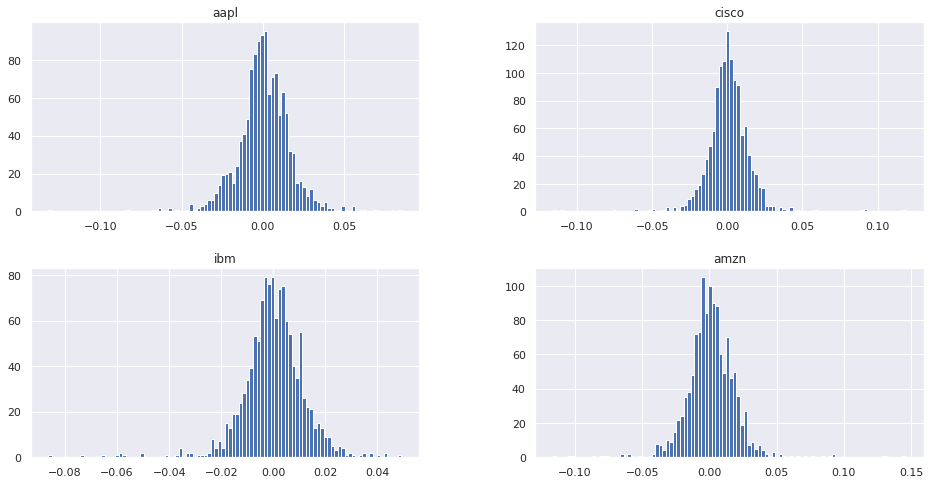

In [25]:
log_ret.hist(bins=100, figsize=(16,8))
plt.show()

Mean of daily log returns

In [26]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

Covariance of daily log returns. It is the covariance matrix ($\sum$) that will be used for calculating the portfolio variance ($\sigma$).

In [28]:
log_ret.cov()*252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


Now lets initialize the expected return and expected variance:<br>
 * Portfolio returns = $\sum{w_i}*{r_i}$ <br>
 * Portfolio volatility = $\sqrt{W^T.\sum.W}$

In [71]:
def get_ret_vol_sr(weights, log_ret=log_ret):
  weights = np.array(weights)
  ret = np.sum(log_ret.mean() * weights * 252)
  vol = np.sqrt(np.dot(weights.T, (np.dot(log_ret.cov()*252, weights))))
  sr = ret/vol
  return ret, vol, sr

In [72]:
print('stocks:', ' '.join(stocks.columns))
np.random.seed(101)
# initializing random weights/holdings for stocks.
weights = np.random.random(4)
weights/=weights.sum()
print('weights', ' '.join([str(np.round(w,3)) for w in weights]))

exp_ret, exp_vol, SR = get_ret_vol_sr(weights, log_ret=log_ret)
# expected return.
print('expected returns:', np.round(exp_ret, 3))

# expected variance/volatility.
print(f'expected volatility:', np.round(exp_vol, 3))

# Calculating Sharpe ratio
print('Sharpe ratio:', np.round(SR, 3))

stocks: aapl cisco ibm amzn
weights 0.401 0.443 0.022 0.133
expected returns: 0.156
expected volatility: 0.185
Sharpe ratio: 0.843


Time to design a setup for Monte Carlo stimulation to get data for 1000 random data points

In [73]:
np.random.seed(101)
all_weights, all_returns, all_volatility, all_sharpe_ratio = [], [], [], []
num_samples = 5000
risk_free_rate = 0

for i in range(num_samples):
  # Initializing random weights/holdings for stocks.
  weights = np.random.random(4)
  weights/=weights.sum()
  all_weights.append(weights)
  exp_ret, exp_vol, SR = get_ret_vol_sr(weights, log_ret=log_ret)
  # Expected return.
  all_returns.append(exp_ret)
  # Expected variance/volatility
  all_volatility.append(exp_vol)
  # Calculating Sharpe ratio
  all_sharpe_ratio.append(SR)

Let's check the best sharpe ratio and the other parameters

In [74]:
idx = np.argmax(all_sharpe_ratio)
print('stocks:', '  '.join(stocks.columns))
print('weights', ' '.join(str(np.round(w, 3)) for w in all_weights[idx]))
print('expected returns:', all_returns[idx])
print(f'expected volatility:', all_volatility[idx])
print('Sharpe ratio:', all_sharpe_ratio[idx])

stocks: aapl  cisco  ibm  amzn
weights 0.262 0.208 0.001 0.529
expected returns: 0.21857805695172722
expected volatility: 0.21214454964429413
Sharpe ratio: 1.0303260551271303


In [75]:
fig = px.scatter(x=all_volatility, y=all_returns, color=all_sharpe_ratio,
                 labels={"x": "Volatility", "color": "Sharpe ratio",
                         "y": "Returns"}, title="Efficient frontier")

fig.show()

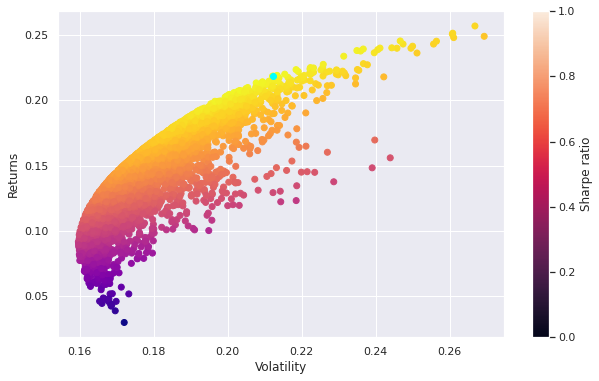

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(all_volatility, all_returns, c=all_sharpe_ratio, cmap='plasma')
plt.scatter(all_volatility[idx], all_returns[idx], c='cyan')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

Let's use optimization technique to minimize this function

In [79]:
from scipy.optimize import minimize
# help(minimize)

In [88]:
def neg_sharpe(weights):
  # returns the negative SR that we want to minimize.
  sr = get_ret_vol_sr(weights)[-1]
  return -sr

In [89]:
def check_sum(weights):
  # This is a constraint, we want the sum of weights to be 1.
  return np.sum(weights) - 1

In [90]:
# Defining the check_sum as a constraint in terms of equation.
cons = ({'type':'eq', 'fun':check_sum})

In [91]:
# range constraints for each of the weights (must be between 0, 1)
bounds = ((0,1), (0,1), (0,1), (0,1))

In [92]:
# initial random weights to begin with
init_guess = [0.25, 0.25, 0.25, 0.25]

In [93]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [94]:
opt_results

     fun: -1.0307168703355247
     jac: array([ 5.64157963e-05,  4.18275595e-05,  3.39921728e-01, -4.44948673e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628978, 0.20418982, 0.        , 0.52952041])

In [95]:
weights = opt_results.x # optimal weights as per the minimization algo.
get_ret_vol_sr(weights) # let's check the other parameters at these weights.

(0.21885915495508557, 0.2123368320185167, 1.0307168703355247)

Let's calculate the efficient frontier now

In [96]:
frontier_y = np.linspace(0,0.3,100)

In [98]:
def minimize_volatility(weights):
  return get_ret_vol_sr(weights)[1]

In [105]:
frontier_volatility = []

for ret in frontier_y:
  cons = ({'type':'eq', 'fun':check_sum},
          {'type':'eq', 'fun':lambda w: get_ret_vol_sr(w)[0]-ret})
  result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
  frontier_volatility.append(result['fun'])

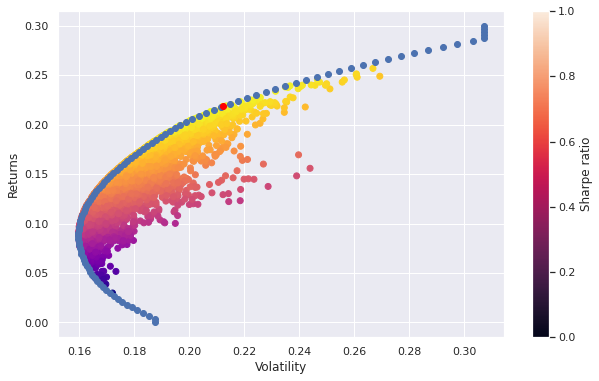

In [121]:
plt.figure(figsize=(10,6))
plt.scatter(all_volatility, all_returns, c=all_sharpe_ratio, cmap='plasma')
plt.scatter(frontier_volatility, frontier_y)
plt.scatter(all_volatility[idx], all_returns[idx], c='red')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()